In [1]:
# %matplotlib inline
%matplotlib notebook
import rasterio
from rasterio.plot import show
from rasterio.coords import BoundingBox
from rasterio import windows
from rasterio import warp
from rasterio import mask
import numpy as np
import matplotlib.pyplot as plt
import rasterio.plot as plot
from matplotlib.patches import Rectangle
import matplotlib._color_data as mcd

In [2]:
base_url = "/home/diego/Proyecto Vivero/data/imagenes_segmentacion"
url_rasters = [
    base_url+"/20041/Planet_RGBNIR_20041.tif",
    base_url+"/20123/Planet_RGBNIR_20123.tif",
    base_url+"/20128/Planet_RGBNIR_20128.tif",
    base_url+"/20242/Planet_RGBNIR_20242.tif",
    base_url+"/20521/Planet_RGBNIR_20521.tif"
]

<IPython.core.display.Javascript object>


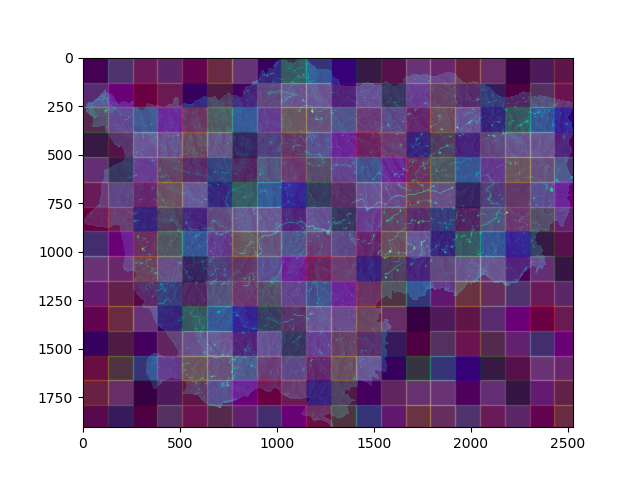

In [3]:
raster = rasterio.open(url_rasters[0])
show(raster)

In [7]:
print(raster.height,raster.width,raster.transform,raster.crs)

1823 2488 | 0.01, 0.00, 738084.06|
| 0.00,-0.01, 6090382.52|
| 0.00, 0.00, 1.00| EPSG:32718


In [4]:
colores = list({name for name in mcd.CSS4_COLORS
           if "xkcd:" + name in mcd.XKCD_COLORS})
offsetX = 0
offsetY = 0
widthX = 128
widthY = 128
step = 128
windows_list = []

In [5]:
datos_b1 = raster.read(2)
plt.imshow(datos_b1)
ax = plt.gca()
contador = 0
while (1):
#     print(offsetY,offsetX,widthX,widthY)
    i_color = (contador)%len(colores)
    offsetX = offsetX + step 
    # finalizar si se a recorrido toda la imagen
    if(offsetY >= raster.height and offsetX >= raster.width):
#         print("final")
        print(offsetY, raster.height)
        print(offsetX, raster.width)
        break
    #cuando llegue al borde en el eje x, debo bajar(sumar en eje y) y debo volver a empezar setear offsetX en 0 y widthX en 100
    elif(offsetX >= raster.width):
#         print("entro")
        offsetY = offsetY + step
        offsetX = 0
    windows_list.append(windows.Window(offsetX,offsetY,widthX,widthY))
    ax.add_patch(Rectangle((windows_list[contador].col_off,windows_list[contador].row_off),
                       width=windows_list[contador].width,
                       height=windows_list[contador].height,fill=True,alpha=.2,
                 color=colores[i_color]))
    contador = contador + 1

1920 1906
2560 2529


In [7]:
contador = 1000
datos_b1 = raster.read(2)
plt.imshow(datos_b1)
ax = plt.gca()
ax.add_patch(Rectangle((windows_list[contador].col_off,windows_list[contador].row_off),
                       width=windows_list[contador].width,
                       height=windows_list[contador].height,fill=True,alpha=1,
                 color=colores[1]))

In [9]:
len(windows_list)

48575

In [41]:
with rasterio.open(url_imagen) as src:
    b, g, r = (src.read(k,window=windows_list[20000]) for k in (1, 2, 3))
    meta = src.meta
 

In [26]:
print(windows_list[0].width,windows_list[0].height)

100 100


In [42]:
with rasterio.open('salida3.tif', 'w',**meta) as dst:
        for k, a in [(1, b), (2, g), (3, r)]:
            dst.write(a, indexes=k)
        

In [62]:
from pyproj import Proj, transform
inProj = Proj(init='EPSG:32718')
outProj = Proj(init='epsg:3035')
x1,y1 = (-72.381572,-35.30144)
x2,y2 = (-72.381570,-35.301499)
distance = np.sqrt((x2-x1)**2 +(y2-y1)**2)
print(distance)